In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import sklearn.preprocessing as sp

###  データの読み込み Loading data

In [2]:
data = pd.read_csv("data/airquality.csv", delimiter=",")
print(data.head())
data.dropna(inplace=True) #欠損値NaNを除外  Remove missing values
print(data.head())

   Unnamed: 0  Ozone  Solar  Wind  Temp  Month  Day
0           1   41.0  190.0   7.4    67      5    1
1           2   36.0  118.0   8.0    72      5    2
2           3   12.0  149.0  12.6    74      5    3
3           4   18.0  313.0  11.5    62      5    4
4           5    NaN    NaN  14.3    56      5    5
   Unnamed: 0  Ozone  Solar  Wind  Temp  Month  Day
0           1   41.0  190.0   7.4    67      5    1
1           2   36.0  118.0   8.0    72      5    2
2           3   12.0  149.0  12.6    74      5    3
3           4   18.0  313.0  11.5    62      5    4
6           7   23.0  299.0   8.6    65      5    7


In [8]:
data

,Unnamed: 0,Ozone,Solar,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7
7,8,19.0,99.0,13.8,59,5,8
8,9,8.0,19.0,20.1,61,5,9
11,12,16.0,256.0,9.7,69,5,12
12,13,11.0,290.0,9.2,66,5,13
13,14,14.0,274.0,10.9,68,5,14


### 散布図の図示 Scatter matrix

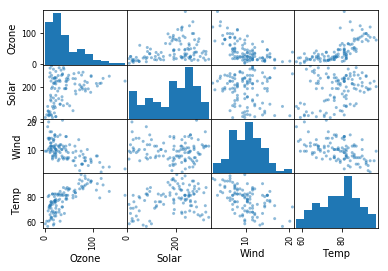

In [3]:
X = data[['Solar','Wind','Temp']] # 独立（説明）変数 independent variable
y = data[['Ozone']] # 従属（目的）変数 dependent  variable
scatter_matrix(data[['Ozone','Solar','Wind','Temp']]) # 対散布図をプロット Scatter matrix
plt.show()

### 回帰分析の実行

In [4]:
# ラベル名を用いるときのモデルの設定 Construct a linear regression model
model = smf.ols(formula = "Ozone ~ Solar + Wind + Temp", data = data)

# 回帰分析の実行 Execute linear  regression 
results = model.fit()
# 結果を表示　Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           1.51e-21
Time:                        16:55:38   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.3421     23.055     -2.791      0.0

### マハラノビスの距離の二乗を求める関数を定義 Define a function to find the square of Mahalanobis distance

In [5]:
def Mahala2(vec_x, vec_mean, mat):
    length = mat.shape[0]
    vec_x = np.array(vec_x, dtype='float64')
    vec = np.asmatrix((vec_x - vec_mean).values.reshape(length, 1))
    inv = np.linalg.inv(mat) # 逆行列を求める　Compute the inverse of a matrix.
    mahala2 = vec.T.dot(inv.dot(vec)) 
    return mahala2[0, 0]

### 理論値・予測値の区間推定　Interval estimation of the theoretical value and the predicted value

In [6]:
Sigma = np.asmatrix(data[['Solar','Wind','Temp']].cov()) # 独立変数の分散共分散行列を求める． Variance-covariance matrix of IVs.
n = len(data) # 標本数. Sample size.
dfm = results.df_model # 独立変数の数（モデルの自由度）．　Number of IVs (Model degrees of freedom). 
t_0025 = ss.t.isf(q=0.05/2, df=n-dfm-1) # 自由度 n-dfm-1のt分布の上側2.5パーセント点(= ss.t.ppf(q=0.975, df=n-dfm-1))
vec_mean = data[['Solar','Wind','Temp']].mean() # 独立変数の平均を求める　Find average of independent variables
print(vec_mean)

#観測値に対応する従属変数の信頼区間を求める Find CI of Y on observed values
X = np.array([1, 190, 7.4, 67]) #観測値の設定
hat_y=X.dot(results.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2([190, 7.4, 67], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Ve = results.scale #  残差変動の不偏分散． A scale factor for the covariance matrix.
Se_o = np.sqrt((1/n + D2_0 / (n-1)) * Ve) #観測値の場合　In case of observed value

ci_low = hat_y - t_0025 * Se_o# 下側信頼
ci_up = hat_y + t_0025 * Se_o # 上側信頼

print("理論値（theoretical value）:", hat_y)
print("理論値の信頼区間（CI of theoretical value）：({0},{1})".format(ci_low,ci_up))

#予測値（未観測値に対応する従属変数）の信頼区間を求める Find prediction interval of Y on unobserved values
X = np.array([1, 130,10,78]) #未観測値の設定
hat_y=X.dot(results.params) # Xとresults.paramsの内積を求め従属変数の推定値を求める　Obtain estimated value of dependent variable

D2_0 = Mahala2([130,10,78], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance

Se_p = np.sqrt((1 + 1/n + D2_0 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

pi_low = hat_y - t_0025 * Se_p# 下側信頼
pi_up = hat_y + t_0025 * Se_p # 上側信頼

print("予測値（Predicted value）:", hat_y)
print("予測値の信頼区間（CI of predicted value）：({0},{1})".format(pi_low,pi_up))

Solar    184.801802
Wind       9.939640
Temp      77.792793
dtype: float64
理論値（theoretical value）: 33.04548254114045
理論値の信頼区間（CI of theoretical value）：(24.426583110977237,41.66438197130367)
予測値（Predicted value）: 38.96193176961727
予測値の信頼区間（CI of predicted value）：(-3.2923684207649444,81.21623195999949)


### 理論値・予測値の信頼区間の可視化 Visualization of confidence intervals of theoretical and predicted values

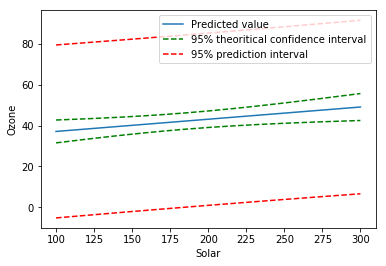

In [7]:
solar = np.linspace(100, 300, 200) # 100から300までの等差数列を生成

hat_y = []
(wind, temp) = (10, 78) # Wind, Tempの値を(10, 78)に固定.　Wind, Temp values are fixed to (10, 78).

for s in solar:
    X = np.array([1, s, wind, temp])
    hat_y.append(X.dot(results.params))# Xとresults.paramsの内積を求め従属変数の推定値を求める Obtain estimated value of dependent variable
plt.plot(solar, hat_y, label="Predicted value") # 予測値をプロット

D2 = []
for s in solar:
    D2_0 = Mahala2([s, wind, temp], vec_mean, Sigma) # マハラノビス距離の二乗を求める Squared Mahalanobis distance
    D2.append(D2_0)
D2 = np.array(D2)

Se_o = np.sqrt((1/n + D2 / (n-1)) * Ve) #観測値の場合　In case of observation value
Se_p = np.sqrt((1 + 1/n + D2 / (n-1)) * Ve) #未観測値の場合　In case of unobserved value

# 観測値に対応する従属変数の信頼区間をプロット
plt.plot(solar, hat_y - t_0025 * Se_o, "--g", label="95% theoritical confidence interval")
plt.plot(solar, hat_y + t_0025 * Se_o, "--g")

# 予測値の信頼区間をプロット
plt.plot(solar, hat_y - t_0025 * Se_p, "--r", label="95% prediction interval")
plt.plot(solar, hat_y + t_0025 * Se_p, "--r")

plt.xlabel("Solar")
plt.ylabel("Ozone")
plt.legend()
plt.show()